___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [11]:
data = pd.read_csv('Groceries.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.shape

(9835, 32)

In [19]:
# Описова статистика
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,chocolate,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [33]:
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i,j]) for j in range(data.shape[1]) if pd.notna(data.values[i,j])])


In [34]:
res = [x for l in transactions for x in l]


In [36]:
# виведіть топ-3 продукти, що продаються

from collections import Counter

Counter(res).most_common(3)

[('whole milk', 2513), ('other vegetables', 1903), ('rolls/buns', 1809)]

In [42]:
# виведіть топ-2 пари продуктів, що продаються
from itertools import combinations

def collect_pairs(lines):
    pair_counter = Counter()
    for line in lines:
        unique_tokens = sorted(set(line))  # exclude duplicates in same line and sort to ensure one word is always before other
        combos = combinations(unique_tokens, 2)
        pair_counter += Counter(combos)
    return pair_counter

pairs = collect_pairs(transactions)

pairs.most_common(2)

[(('other vegetables', 'whole milk'), 736),
 (('rolls/buns', 'whole milk'), 557)]

In [38]:

!pip install apyori
from apyori import apriori

association_rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, max_length=2)
association_rules

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=932c847bf3cb421a59424efd204ff75b6781be0de8ac5ae5938d5e45d5b1bc07
  Stored in directory: c:\users\алекс\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


<generator object apriori at 0x00000170B27AD0B0>

In [39]:


for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1] )

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")





Rule: baking powder -> whipped/sour cream
Support: 0.004575495678698526
Confidence: 0.25862068965517243
Lift: 3.607850330154072
Rule: root vegetables -> beef
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: whipped/sour cream -> berries
Support: 0.009049313675648195
Confidence: 0.27217125382262997
Lift: 3.796885505454703
Rule: liquor -> bottled beer
Support: 0.004677173360447382
Confidence: 0.4220183486238532
Lift: 5.240594013529793
Rule: bottled beer -> red/blush wine
Support: 0.004880528723945094
Confidence: 0.253968253968254
Lift: 3.1537598204264876
Rule: sugar -> flour
Support: 0.00498220640569395
Confidence: 0.28654970760233917
Lift: 8.46311223504206
Rule: root vegetables -> herbs
Support: 0.007015760040671073
Confidence: 0.43124999999999997
Lift: 3.956477378731343
Rule: sausage -> sliced cheese
Support: 0.007015760040671073
Confidence: 0.2863070539419087
Lift: 3.047434930215013


Висновки:
    Ми провели описову статистику.
    З наших данних ми визначили ті товари які найбільш популярні серед покупців:
        топ 3 товари
        топ 2 пари товарів.
    Це надасть нам можливість оптимізувати розкладку товарів в магазинах.
    Контролювати наявність популярних товарів на складі.
    

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
mall = pd.read_csv('Mall_Customers.csv')

print(mall.shape)
mall.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
# # Перетворюємо дані стовбця gender 1 - чоловік, 2 - жінка 
# gender = mall['Gender'].tolist()

# gender_male = []
# gender_female = []
# for gen in gender:
#     if gen == 'Male':
#         gender_male.append(2)
#     else:
#         gender_male.append(0)
        

# for gen in gender:
#     if gen == 'Female':
#         gender_female.append(1)
#     else:
#         gender_female.append(1)

In [60]:
# mall['Gender_male'] = gender_male
# mall['Gender_female'] = gender_female

In [68]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


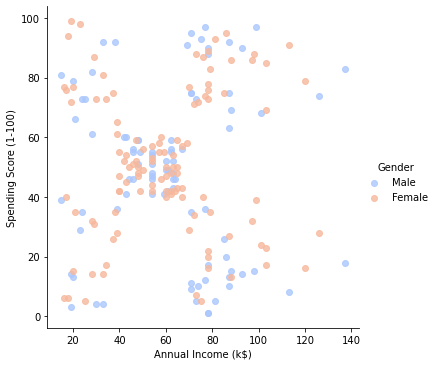

In [70]:
sns.lmplot('Annual Income (k$)','Spending Score (1-100)', data=mall, hue='Gender',
           palette='coolwarm', fit_reg=False)

 Видно четкое разделение на кластеры (см. График выше) в зависимости оценки расходов от годового дохода.
  Остальные пары параметров не показывают четких кластеров, поэтому мы не будем их рассматривать.

In [71]:
# Можно выделить 5 кластеров
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [75]:
# Мы опускаем столбец Gernder, так как на графике выше отсутствует гендерное разделение.
kmeans.fit(df.drop('Gender',axis=1))

KMeans(n_clusters=5)

In [76]:
KMeans(n_clusters=5)

KMeans(n_clusters=5)

In [77]:
kmeans.cluster_centers_

array([[ 96.01694915,  41.55932203,  59.05084746,  49.03389831],
       [164.        ,  40.80555556,  87.91666667,  17.88888889],
       [ 21.41666667,  25.25      ,  24.91666667,  76.04166667],
       [162.        ,  32.69230769,  86.53846154,  82.12820513],
       [ 40.45238095,  46.85714286,  35.47619048,  35.11904762]])

In [78]:

kmeans.inertia_

157572.1620749777

In [79]:
kmeans.labels_

array([2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

Text(0, 0.5, 'Inertia')

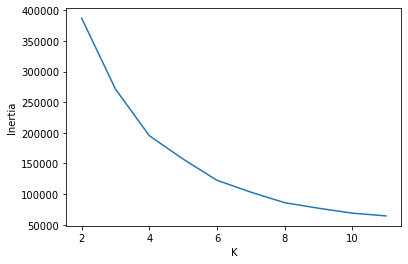

In [80]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df.drop('Gender',axis=1))
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

In [83]:

def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
mall['Cluster'] = mall['Gender'].apply(converter)
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [84]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(mall['Cluster'],kmeans.labels_))
print(classification_report(mall['Cluster'],kmeans.labels_))

[[59 36 24 39 42]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.46       200
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.29       200
   macro avg       0.20      0.06      0.09       200
weighted avg       1.00      0.29      0.46       200



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


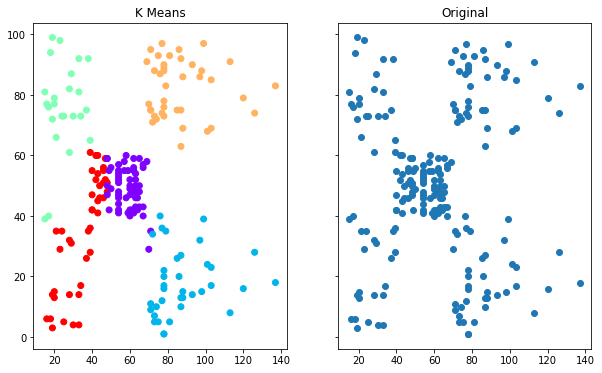

In [85]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],cmap='rainbow')

Выводы:

    Мы проанализировали зависимость показателя расходов от годового дохода, то есть того, сколько люди тратят денег и сколько они зарабатывают.

    Использование модели K-mean позволило выделить 5 групп клиентов. Эта модель работает неплохо, однако часть «среднего» кластера (фиолетовая) была добавлена ​​к зеленому кластеру. Опишем полученные результаты:

        Кластер 1 (светлый синий). У этих людей низкий доход, и они мало тратят. Они будут отдавать предпочтение дешевым товарам и не покупать дорогие.

        Кластер 2 (фиолетовый). Это самая большая группа клиентов. У них средний уровень доходов и такой же уровень затрат. Эти люди будут ходить по магазинам в торговые центры среднего уровня.

        Кластер 3 (красный). Люди с высоким доходом и высокой скоростью трат. Зарабатывай больше - трать больше. Целевая аудитория для дорогих брендов.

        Кластер 4 (оранжевый). Люди не тратят столько, сколько зарабатывают. Эта группа может быть интересна банкам, которые могут предлагать различные варианты вкладов и инвестиций.

        Кластер 5 (зеленый). Люди живут не по средствам. Они предпочитают тратить больше, чем зарабатывают. Эта группа всегда будет искать ссуды. Однако смогут ли они расплатиться?